In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import dask
from dask_jobqueue import SGECluster
from dask.distributed import Client
import dask.dataframe as dd

# The following can be necessary in some cases
def limit_numpy(nthreads=4):
     """ """
     import os
     threads = str(nthreads)
     print(f"threads {threads}")
     os.environ["NUMEXPR_NUM_THREADS"] = threads
     os.environ["OMP_NUM_THREADS"] = threads
     os.environ["OPENBLAS_NUM_THREADS"] = threads
     os.environ["MKL_NUM_THREADS"] = threads
     os.environ["VECLIB_MAXIMUM_THREADS"] = threads

limit_numpy(4)

threads 4


In [2]:
cluster = SGECluster(name="dask-worker",  walltime="05:00:00", memory='12GB', death_timeout=120, project="P_lsst", 
                     resource_spec='sps=1', cores=1, processes=1, queue="mc_highmem", env_extra=["export MALLOC_TRIM_THRESHOLD_=131072"])
cluster.scale(100)
client = Client(cluster)

In [41]:
#cluster.scale(100)

In [3]:
client

Client Scheduler: tcp://134.158.48.25:33690 Dashboard: http://134.158.48.25:8787/status,Cluster Workers: 7 Cores: 7 Memory: 78.26 GiB


In [17]:
data_path = "/sps/lsst/groups/desc/skysim5000_v1.1.1_native/skysim5000_v1.1.1_healpix610*.parquet"
#data_path = "/sps/lsst/groups/desc/shared/xgal/skysim/skysim5000_v1.1.1_parquet/skysim5000_v1.1.1_healpix*.parquet"

columns = ["ra", "dec", "halo_id", "halo_mass", "redshift", "mag_true_u_lsst", "mag_true_g_lsst", "mag_true_r_lsst", 
           "mag_true_i_lsst", "mag_true_z_lsst", "mag_true_y_lsst"]

df = dd.read_parquet(data_path, columns=columns, engine='pyarrow', kwargs={'dataset': {'use_legacy_dataset': False}})

In [18]:
df.head()

,ra,dec,halo_id,halo_mass,redshift,mag_true_u_lsst,mag_true_g_lsst,mag_true_r_lsst,mag_true_i_lsst,mag_true_z_lsst,mag_true_y_lsst
0,58.131964,-0.498545,6100487,8.849341e+10,0.023921,19.838377,18.988415,18.645218,18.420031,18.308123,18.230036
1,58.864807,-0.158451,106100487,5.465768e+10,0.023938,21.250103,20.349880,20.083086,19.936708,19.893776,19.858427
2,57.595398,-0.195226,206100487,5.101386e+11,0.020154,17.098898,15.393529,14.583299,14.163846,13.860703,13.668979
3,57.918701,-0.795808,-6100487,2.495156e+10,0.012601,19.886112,18.766951,18.356285,18.167084,18.101410,18.057564
4,58.017055,-0.267273,-106100487,6.507326e+10,0.020661,20.640907,19.695522,19.276979,19.036837,18.920933,18.842918


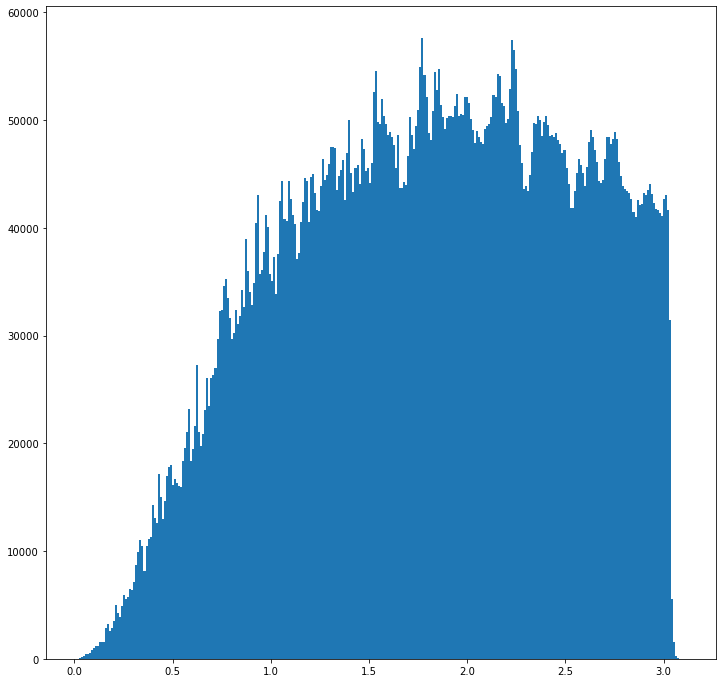

In [15]:
plt.figure(figsize=(12, 12))
_ = plt.hist(df.redshift, bins=300)

In [16]:
len(df)

10929427

In [19]:
data = df.compute()

In [20]:
data

,ra,dec,halo_id,halo_mass,redshift,mag_true_u_lsst,mag_true_g_lsst,mag_true_r_lsst,mag_true_i_lsst,mag_true_z_lsst,mag_true_y_lsst
0,58.131964,-0.498545,6100487,8.849341e+10,0.023921,19.838377,18.988415,18.645218,18.420031,18.308123,18.230036
1,58.864807,-0.158451,106100487,5.465768e+10,0.023938,21.250103,20.349880,20.083086,19.936708,19.893776,19.858427
2,57.595398,-0.195226,206100487,5.101386e+11,0.020154,17.098898,15.393529,14.583299,14.163846,13.860703,13.668979
3,57.918701,-0.795808,-6100487,2.495156e+10,0.012601,19.886112,18.766951,18.356285,18.167084,18.101410,18.057564
4,58.017055,-0.267273,-106100487,6.507326e+10,0.020661,20.640907,19.695522,19.276979,19.036837,18.920933,18.842918
...,...,...,...,...,...,...,...,...,...,...,...
2768743,82.023480,-0.024175,-5931006109121,1.673892e+10,3.008037,33.269989,31.735304,31.054432,30.937990,31.065603,30.939274
2768744,82.409851,-0.632912,-5931106109121,3.414171e+10,2.971065,30.942528,29.226955,28.697134,28.713272,28.831709,28.764608
2768745,83.037942,-0.463888,-5931206109121,2.850907e+10,2.977482,37.603584,32.579437,30.678026,30.095507,29.907740,29.820778
2768746,83.196291,-0.007605,-5931306109121,2.482336e+10,2.962295,28.987837,27.942955,27.797619,27.873158,27.947891,28.032623


In [21]:
magCol = ["mag_true_u_lsst", "mag_true_g_lsst", "mag_true_r_lsst", 
           "mag_true_i_lsst", "mag_true_z_lsst", "mag_true_y_lsst"]
mags = data[magCol]
z = data.redshift

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [8]:
train_mag, val_mag, train_z, val_z = train_test_split(mags, z,random_state = 0)

In [9]:
forest_model = RandomForestRegressor(random_state=1, n_estimators=150)

In [10]:
%%time
from joblib import Parallel, parallel_backend
with parallel_backend('dask'):
  forest_model.fit(train_mag, train_z)

CPU times: user 9min 21s, sys: 3min 46s, total: 13min 7s
Wall time: 18min 13s


In [11]:
%%time
with parallel_backend('dask'):
    pred_z = forest_model.predict(val_mag)
print(mean_absolute_error(val_z, pred_z))

0.0068507671054829486
CPU times: user 14min 48s, sys: 42.1 s, total: 15min 30s
Wall time: 22.4 s


In [16]:
# Saving model
import joblib

joblib.dump(forest_model, "./random_forest.joblib", compress=3)

['./random_forest.joblib']

In [ ]:
# Reading back model
loaded_rf = joblib.load("./random_forest.joblib")

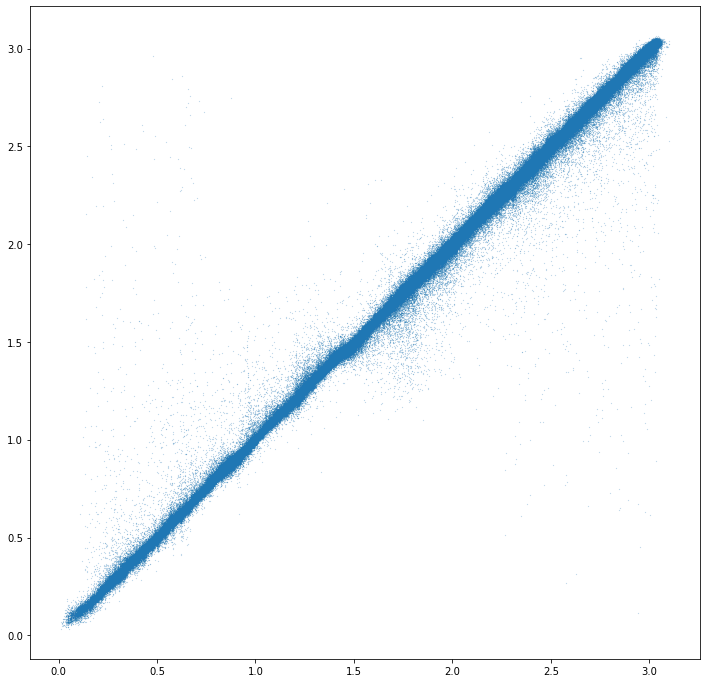

In [12]:
plt.figure(figsize=(12, 12))
#_ = plt.hist2d(val_z, pred_z, 512, cmap='viridis')
_ = plt.scatter(val_z, pred_z, s=0.01)

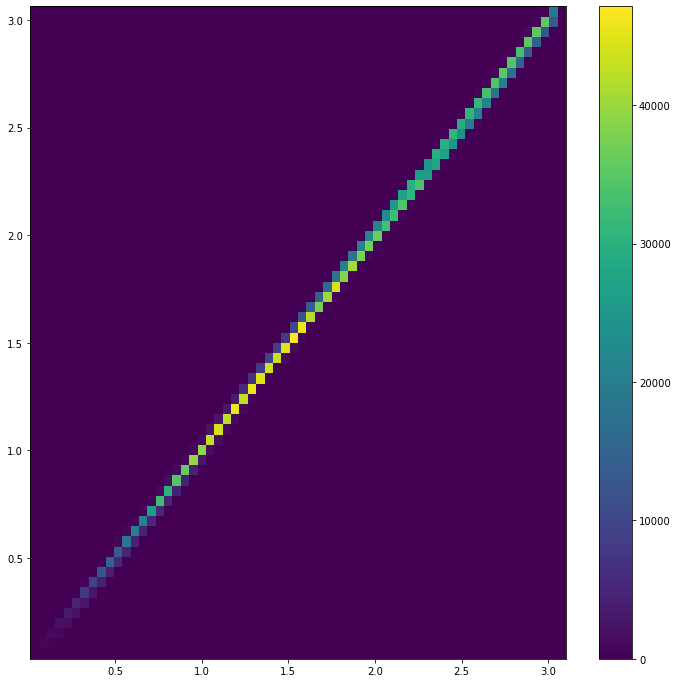

In [13]:
plt.figure(figsize=(12, 12))
_ = plt.hist2d(val_z, pred_z, 64, cmap='viridis')
plt.colorbar()

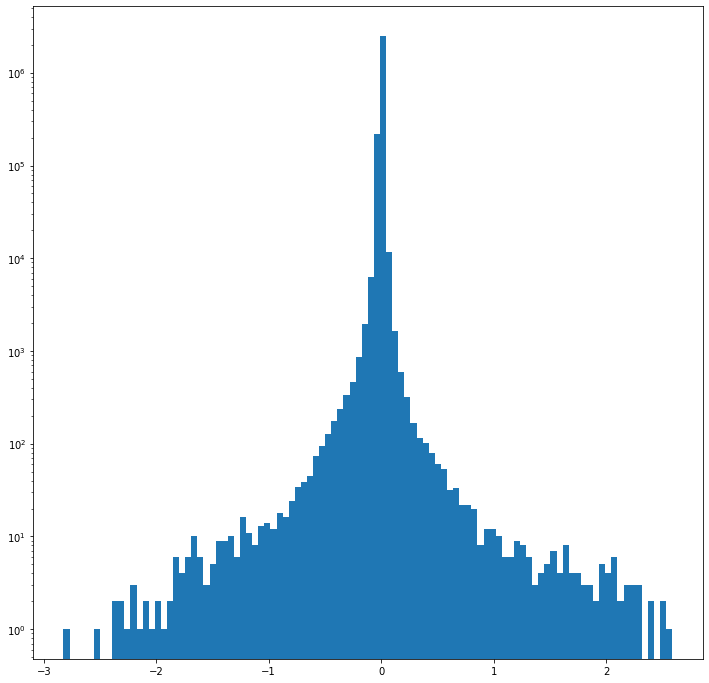

In [14]:
plt.figure(figsize=(12, 12))
_ = plt.hist(pred_z-val_z, bins=100)
plt.yscale("log")

In [22]:
# Testing the model on a different set of healpixels
%%time
with parallel_backend('dask'):
    pred_z = forest_model.predict(mags)

CPU times: user 1h 19min 38s, sys: 2min 42s, total: 1h 22min 21s
Wall time: 2min 45s


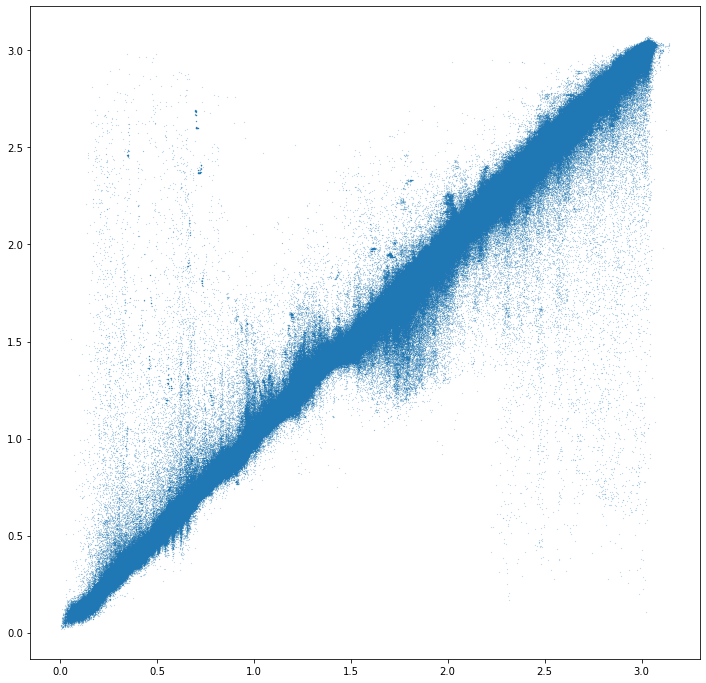

In [23]:
plt.figure(figsize=(12, 12))
#_ = plt.hist2d(val_z, pred_z, 512, cmap='viridis')
_ = plt.scatter(z, pred_z, s=0.01)

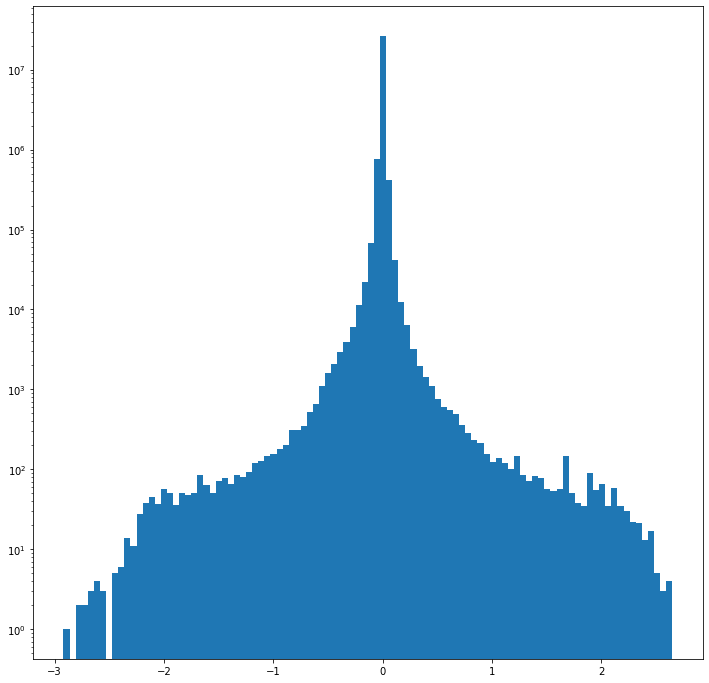

In [26]:
plt.figure(figsize=(12, 12))
_ = plt.hist(pred_z-z, bins=100)
plt.yscale("log")

In [2]:
import GCRCatalogs
from GCR import GCRQuery

In [4]:
GCRCatalogs.get_available_catalogs(name_startswith="skysim")

{'skysim5000_v1.1.1': {'subclass_name': 'cosmodc2.SkySim5000GalaxyCatalog',
  'catalog_root_dir': '/sps/lsst/groups/desc/shared/xgal/skysim//skysim5000_v1.1.1',
  'catalog_filename_template': 'z_{}_{}.step_all.healpix_{}.hdf5',
  'cosmology': {'H0': 71.0,
   'Om0': 0.2648,
   'Ob0': 0.0448,
   'sigma8': 0.8,
   'n_s': 0.963},
  'lightcone': True,
  'version': '1.1.1',
  'check_md5': False,
  'check_size': False,
  'check_cosmology': False,
  'ensure_meta_consistent': False,
  'sky_area': 5264.05,
  'creators': ['Andrew Hearin',
   'Danila Korytov',
   'Eve Kovacs',
   'Esteban Rangel',
   'Patricia Larsen',
   'Joe Hollowed',
   'Andrew Benson',
   'Katrin Heitmann'],
  'description': 'This is the 5000 sq. deg. extra-galactic catalog for LSST DESC\n',
  'include_in_default_catalog_list': True}}

In [5]:
object_cat = GCRCatalogs.load_catalog("skysim5000_v1.1.1")

In [7]:
object_cat.list_all_quantities()

['sed_6954_431_bulge',
 'sed_5467_339_disk_no_host_extinction',
 'sed_3381_209_bulge',
 'sed_1000_246',
 'sed_9395_583_disk_no_host_extinction',
 'sed_6548_406_bulge_no_host_extinction',
 'mag_u_sdss_no_host_extinction',
 'halo_mass',
 'sed_4048_251_no_host_extinction',
 'sed_5148_319_bulge_no_host_extinction',
 'dec_true',
 'Mag_true_u_lsst_z0',
 'sed_1933_474_bulge',
 'velocity_z',
 'magnification',
 'sed_3184_197_bulge',
 'sed_1933_474_disk_no_host_extinction',
 'sed_8329_517_disk_no_host_extinction',
 'sed_1000_246_disk_no_host_extinction',
 'ellipticity_2_bulge_true',
 'sed_1246_306_no_host_extinction',
 'mag_y_lsst_no_host_extinction',
 'sed_4565_283',
 'sed_2998_186_bulge_no_host_extinction',
 'sed_1933_474',
 'sed_15143_2259_disk',
 'sed_6548_406_bulge',
 'stellar_mass_bulge',
 'mag_true_r_sdss',
 'sed_4048_251',
 'bulge_to_total_ratio_i',
 'mag_true_Y_lsst',
 'sed_1246_306_bulge',
 'sed_2407_591_disk_no_host_extinction',
 'mag_u_lsst',
 'stellar_mass',
 'mag_true_z',
 'Mag_tru